# Analysis of Global Nucleosome Positioning in *Arabidopsis thaliana*
**Author**: Emma Tung Corcoran </br>
**Date Last Modified**: October 27, 2021 </br>

In [1]:
#Load required dependencies
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import os
import seaborn as sns
from scipy.stats import ttest_ind, ttest_rel
import statistics

In [2]:
#Set path to save plot
save_path = "/Users/emmacorcoran/Documents/Jupyter Code/2021_05_24_MNase"

## Load and Clean Data
First, I load the data generated using deeptools and clean by removing empty columns, adding columns corresponding to gene names, and subsectioning data by sample. I also take a look at the metaprofiles by plotting the sum over all genes.

In [3]:
#Load data matrices
#Profile values at each gene
base_path = "/Users/emmacorcoran/Documents/NGS Data/MNase_2021_05_24/deeptools/1500 downstream"
filename = "mnase-reps-proteincoding-1500.tab"
path_to_file = os.path.join(base_path, filename)
data_matrix = pd.read_csv(path_to_file, skiprows=2, sep='\t')

In [4]:
data_matrix.head()

,MNase-1-140-160.mnase-fcnorm,MNase-1-140-160.mnase-fcnorm.1,MNase-1-140-160.mnase-fcnorm.2,MNase-1-140-160.mnase-fcnorm.3,MNase-1-140-160.mnase-fcnorm.4,MNase-1-140-160.mnase-fcnorm.5,MNase-1-140-160.mnase-fcnorm.6,MNase-1-140-160.mnase-fcnorm.7,MNase-1-140-160.mnase-fcnorm.8,MNase-1-140-160.mnase-fcnorm.9,...,MNase-8-140-160.mnase-fcnorm.240,MNase-8-140-160.mnase-fcnorm.241,MNase-8-140-160.mnase-fcnorm.242,MNase-8-140-160.mnase-fcnorm.243,MNase-8-140-160.mnase-fcnorm.244,MNase-8-140-160.mnase-fcnorm.245,MNase-8-140-160.mnase-fcnorm.246,MNase-8-140-160.mnase-fcnorm.247,MNase-8-140-160.mnase-fcnorm.248,MNase-8-140-160.mnase-fcnorm.249
0,0.04216,0.06793,0.068600,0.088340,0.09503,0.09202,0.11540,0.07998,0.06458,0.05387,...,0.036720,0.063600,0.075070,0.078680,0.08294,0.07278,0.05639,0.061300,0.04426,0.024260
1,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.013440,0.016060,0.027870,0.038360,0.02918,0.03311,0.02459,0.013110,0.01311,0.003278
2,0.01840,0.01104,0.006693,0.006693,0.01372,0.01338,0.02242,0.05521,0.05555,0.05387,...,0.099330,0.084250,0.047860,0.044580,0.03114,0.01967,0.01508,0.006229,0.01737,0.029500
3,0.04685,0.05822,0.101100,0.104100,0.08031,0.06893,0.02610,0.02008,0.01338,0.02075,...,0.006557,0.006557,0.004917,0.002295,0.02852,0.03934,0.03934,0.041630,0.03508,0.040320
4,0.07931,0.06191,0.038150,0.053210,0.05889,0.07194,0.08633,0.07998,0.07462,0.05622,...,0.033770,0.057040,0.039340,0.042950,0.05606,0.03377,0.03475,0.032460,0.02590,0.032780


In [5]:
#Matrix containing gene names corresponding to each row of data_matrix
filename = "mnase-reps-proteincoding-1500.bed"
path_to_file = os.path.join(base_path, filename)
sorted_genes = pd.read_csv(path_to_file, sep='\t')
#Make dataframe containing gene names and relabel gene naming convention to correspond with RNA-seq data
gene_names = sorted_genes['name'].copy()
gene_num = len(gene_names)
for i in range(gene_num):
    newname = gene_names[i]
    if newname[0:2] == 'AT':
        gene_names[i] = newname[0:-2]

In [6]:
#Make metadata matrix (has profile values and gene names)
metadata = data_matrix.copy()
metadata['gene name'] = gene_names

In [7]:
metadata.head()

,MNase-1-140-160.mnase-fcnorm,MNase-1-140-160.mnase-fcnorm.1,MNase-1-140-160.mnase-fcnorm.2,MNase-1-140-160.mnase-fcnorm.3,MNase-1-140-160.mnase-fcnorm.4,MNase-1-140-160.mnase-fcnorm.5,MNase-1-140-160.mnase-fcnorm.6,MNase-1-140-160.mnase-fcnorm.7,MNase-1-140-160.mnase-fcnorm.8,MNase-1-140-160.mnase-fcnorm.9,...,MNase-8-140-160.mnase-fcnorm.241,MNase-8-140-160.mnase-fcnorm.242,MNase-8-140-160.mnase-fcnorm.243,MNase-8-140-160.mnase-fcnorm.244,MNase-8-140-160.mnase-fcnorm.245,MNase-8-140-160.mnase-fcnorm.246,MNase-8-140-160.mnase-fcnorm.247,MNase-8-140-160.mnase-fcnorm.248,MNase-8-140-160.mnase-fcnorm.249,gene name
0,0.04216,0.06793,0.068600,0.088340,0.09503,0.09202,0.11540,0.07998,0.06458,0.05387,...,0.063600,0.075070,0.078680,0.08294,0.07278,0.05639,0.061300,0.04426,0.024260,AT1G01010
1,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.016060,0.027870,0.038360,0.02918,0.03311,0.02459,0.013110,0.01311,0.003278,AT1G01020
2,0.01840,0.01104,0.006693,0.006693,0.01372,0.01338,0.02242,0.05521,0.05555,0.05387,...,0.084250,0.047860,0.044580,0.03114,0.01967,0.01508,0.006229,0.01737,0.029500,AT1G01030
3,0.04685,0.05822,0.101100,0.104100,0.08031,0.06893,0.02610,0.02008,0.01338,0.02075,...,0.006557,0.004917,0.002295,0.02852,0.03934,0.03934,0.041630,0.03508,0.040320,AT1G01040
4,0.07931,0.06191,0.038150,0.053210,0.05889,0.07194,0.08633,0.07998,0.07462,0.05622,...,0.057040,0.039340,0.042950,0.05606,0.03377,0.03475,0.032460,0.02590,0.032780,AT1G01050


## Plot Sum of All Genes

In [8]:
#Set font 
plt.rcParams.update({'font.sans-serif':'Arial'})
plt.rcParams.update({'font.size': 24})
plt.rcParams['lines.linewidth'] = 2.5

#Add cumulative sum of nucleosome occupancy over all genes and plot profile

#sum all rows
rowsum = data_matrix.sum(axis=0)/27443

#Split data by sample
CL1_data = rowsum[0:250].tolist()
CL2_data = rowsum[250:500].tolist()
CL3_data = rowsum[500:750].tolist()
CL4_data = rowsum[750:1000].tolist()
CL5_data = rowsum[1000:1250].tolist()
CL6_data = rowsum[1250:1500].tolist()
CL7_data = rowsum[1500:1750].tolist()
CL8_data = rowsum[1750:2000].tolist()

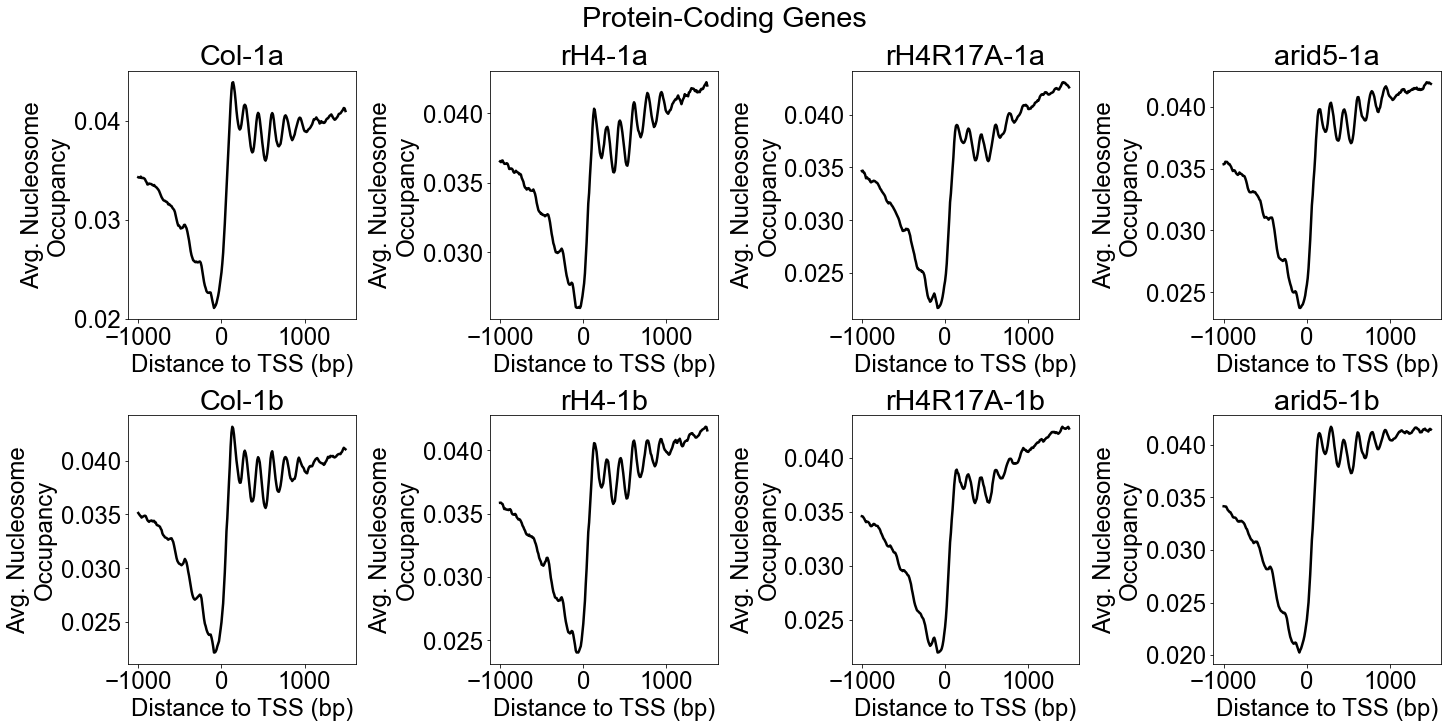

In [9]:
#Plot data
x_vals = np.arange(-1000,1500,10)
fig, axs = plt.subplots(2, 4, constrained_layout=True)
fig.set_size_inches(20, 10)
for ax in axs.flat:
    ax.set(xlabel='Distance to TSS (bp)', ylabel="Avg. Nucleosome" "\n" "Occupancy")
axs[0, 0].plot(x_vals, CL1_data, color="black")
axs[0, 0].set_title('Col-1a')

axs[1, 0].plot(x_vals, CL2_data, color="black")
axs[1, 0].set_title('Col-1b')

axs[0, 1].plot(x_vals, CL3_data, color="black")
axs[0, 1].set_title('rH4-1a')

axs[1, 1].plot(x_vals, CL4_data, color="black")
axs[1, 1].set_title('rH4-1b')

axs[0, 2].plot(x_vals, CL5_data, color="black")
axs[0, 2].set_title('rH4R17A-1a')

axs[1, 2].plot(x_vals, CL6_data, color="black")
axs[1, 2].set_title('rH4R17A-1b')

axs[0, 3].plot(x_vals, CL7_data, color="black")
axs[0, 3].set_title('arid5-1a')

axs[1, 3].plot(x_vals, CL8_data, color="black")
axs[1, 3].set_title('arid5-1b')

fig.suptitle('Protein-Coding Genes')
filename = "protein-coding_profiles/indiv_reps_1500down"
path_to_file = os.path.join(save_path, filename)
plt.savefig(path_to_file)

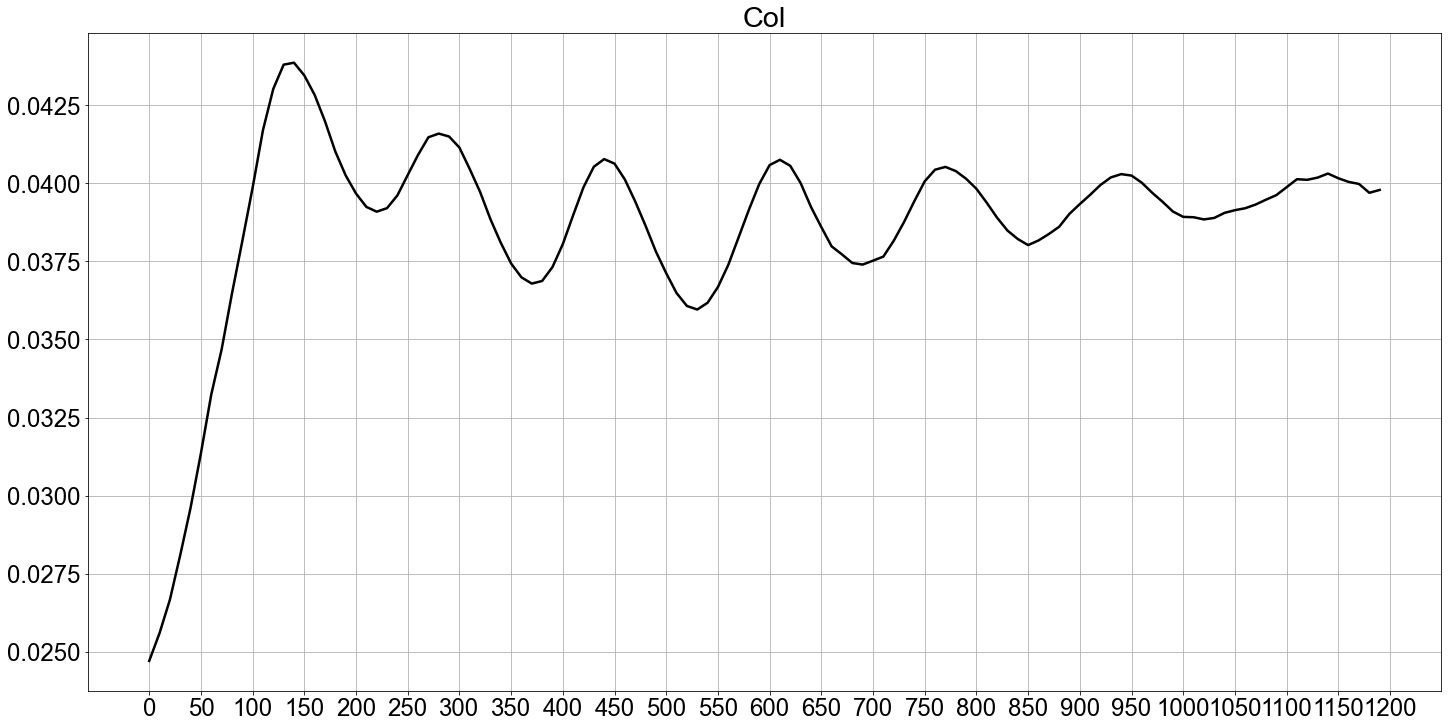

In [10]:
# Plot control sample with gridlines to visualize nucleosome peak coordinates
x_vals = np.arange(0,1200,10)
fig, ax = plt.subplots(1, 1, constrained_layout=True)
fig.set_size_inches(20, 10)
plt.plot(x_vals, CL1_data[100:220], color="black")
ax.set_title('Col')
plt.xticks(np.arange(0, 1250, 50))
ax.grid(True)

In [11]:
# Obtain minimum and maximum from each +1 through +6 nucleosomes and the minimum for 5' NFR

#Function to calculate maximum or minimum for range
def get_max(data, tss_start, start, end, maxmin=True):
    if maxmin==True:
        return max(data[tss_start+start:tss_start+end])
    else:
        return min(data[tss_start+start:tss_start+end])

In [12]:
# Function to obtain minima and maxima from +1 through +6 nucleosomes and calculate peak height
def calc_peaks(nuc_data, firstnuc=3):
    # 3 options for first nuc: (1) take average of 5' and 3' minima, (2) use only 3' minimum, (3) ignore
    
    # Nucleosome maxima and minima are spaced approximately 150 bp apart
    # Each coordinate is 10 bp bin
    #+1 nucleosome max: 75 to 175
    #+1 nucleosome min: 175 to 275
    #+2 nucleosome max: 250 to 350
    #+2 nucleosome min: 300 to 400
    #+3 nucleosome max: 400 to 500
    #+3 nucleosome min: 475 to 575
    #+4 nucleosome max: 550 to 650
    #+4 nucleosome min: 625 to 725
    #+5 nucleosome max: 725 to 825
    #+5 nucleosome min: 800 to 900
    #+6 nucleosome max: 900 to 1000
    #+6 nucleosome min: 975 to 1075

    # Set TSS start coordinate to 100
    tss_start = 100
    
    # Get minimum of 5' NFR
    nfr_min = min(nuc_data)
    
    # Calculate all maxima and minima
    nuc1_max = get_max(nuc_data, tss_start, 7, 18, True)
    nuc1_min = get_max(nuc_data, tss_start, 17, 28, False)
    nuc2_max = get_max(nuc_data, tss_start, 25, 35, True)
    nuc2_min = get_max(nuc_data, tss_start, 30, 40, False)
    nuc3_max = get_max(nuc_data, tss_start, 40, 50, True)
    nuc3_min = get_max(nuc_data, tss_start, 47, 58, False)
    nuc4_max = get_max(nuc_data, tss_start, 55, 65, True)
    nuc4_min = get_max(nuc_data, tss_start, 62, 73, False)
    nuc5_max = get_max(nuc_data, tss_start, 72, 83, True)
    nuc5_min = get_max(nuc_data, tss_start, 80, 90, False)
    nuc6_max = get_max(nuc_data, tss_start, 90, 100, True)
    nuc6_min = get_max(nuc_data, tss_start, 97, 108, False)
    
    # Calculate peak heights
    peak2_height = nuc2_max-statistics.mean([nuc1_min,nuc2_min])
    peak3_height = nuc3_max-statistics.mean([nuc2_min,nuc3_min])
    peak4_height = nuc4_max-statistics.mean([nuc3_min,nuc4_min])
    peak5_height = nuc5_max-statistics.mean([nuc4_min,nuc5_min])
    peak6_height = nuc6_max-statistics.mean([nuc5_min,nuc6_min])
    if firstnuc==1:
        peak1_height = nuc1_max-statistics.mean([nfr_min,nuc1_min])
    elif firstnuc==2:
        peak1_height = nuc1_max-statistics.mean([nuc1_min,nuc1_min])
    else:
        return [peak2_height, peak3_height, peak4_height, peak5_height, peak6_height]
    
    # Return peak heights
    return [peak1_height, peak2_height, peak3_height, peak4_height, peak5_height, peak6_height]

In [13]:
peak_data = []

# Calculate peak data for each sample and append to list
peak_data.append(calc_peaks(CL1_data))
peak_data.append(calc_peaks(CL2_data))
peak_data.append(calc_peaks(CL3_data))
peak_data.append(calc_peaks(CL4_data))
peak_data.append(calc_peaks(CL5_data))
peak_data.append(calc_peaks(CL6_data))
peak_data.append(calc_peaks(CL7_data))
peak_data.append(calc_peaks(CL8_data))

# Initialize peak data frame
colnames = ['Col-1a', 'Col-1b', 'rH4-1a', 'rH4-1b', 'rH4R17A-1a', 'rH4R17A-1b', 'arid5-1a', 'arid5-1b']
peak_df = pd.DataFrame(np.array(peak_data).T.tolist(), columns=colnames)
peak_df.head()

,Col-1a,Col-1b,rH4-1a,rH4-1b,rH4R17A-1a,rH4R17A-1b,arid5-1a,arid5-1b
0,0.003652,0.003849,0.002764,0.002855,0.002189,0.002003,0.002714,0.003199
1,0.004402,0.004414,0.003495,0.003403,0.002484,0.002338,0.002632,0.002864
2,0.004075,0.004523,0.003547,0.003721,0.002348,0.001904,0.002816,0.003167
3,0.002815,0.002733,0.002824,0.002460,0.001608,0.001141,0.002033,0.002050
4,0.001862,0.001820,0.002040,0.001694,0.001047,0.000909,0.001596,0.001413


In [14]:
# Plot nucleosome peak heights
#Set font 
plt.rcParams.update({'font.sans-serif':'Arial'})
plt.rcParams.update({'font.size': 20})

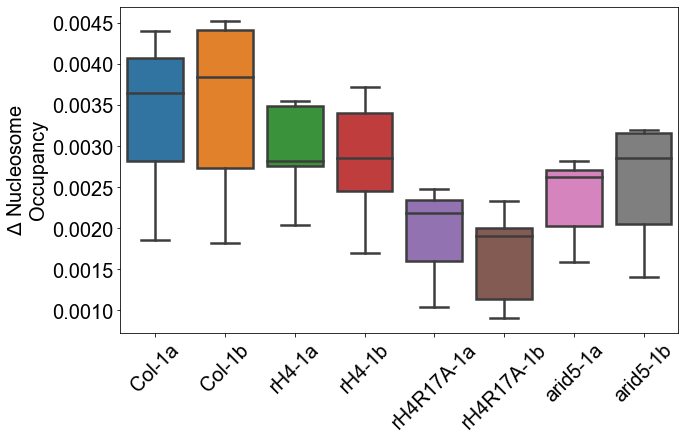

In [15]:
# Plot boxplot
ax = sns.boxplot(x="variable", y="value", data=pd.melt(peak_df), showfliers = False)
plt.ylabel("$\Delta$ Nucleosome" "\n" "Occupancy")
plt.xlabel("")
plt.xticks(rotation = 45)
filename = "peak_height/replicates_nonorm_boxplot"
path_to_file = os.path.join(save_path, filename)
plt.gcf().set_size_inches(10, 6)
plt.savefig(path_to_file,bbox_inches='tight',dpi=500)

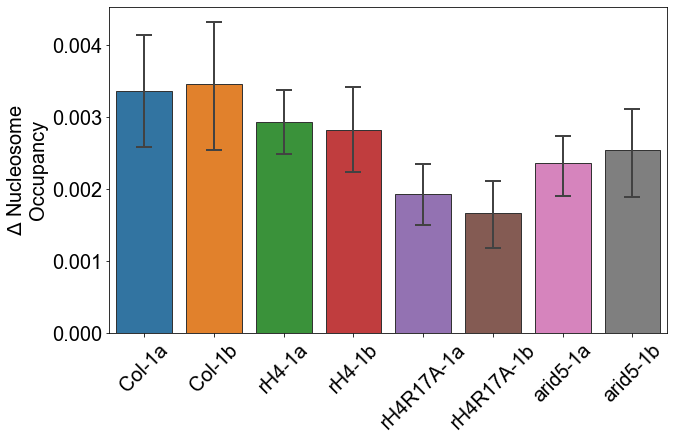

In [16]:
# Plot bar plot with means and standard deviation
ax = sns.barplot(x="variable", y="value", data=pd.melt(peak_df), errwidth=2, capsize=.2, edgecolor=".2")
plt.ylabel("$\Delta$ Nucleosome" "\n" "Occupancy")
plt.xlabel("")
plt.xticks(rotation = 45)
filename = "peak_height/replicates_nonorm_barplot"
path_to_file = os.path.join(save_path, filename)
plt.gcf().set_size_inches(10, 6)
plt.savefig(path_to_file,bbox_inches='tight',dpi=500)

## T-test

In [17]:
# Paired t-test
print("Col-1a vs Col-1b:", ttest_rel(peak_df['Col-1a'], peak_df['Col-1b']))
print("Col-1a vs rH4-1a:", ttest_rel(peak_df['Col-1a'], peak_df['rH4-1a']))
print("Col-1a vs rH4-1b:", ttest_rel(peak_df['Col-1a'], peak_df['rH4-1b']))
print("Col-1a vs rH4R17A-1a:", ttest_rel(peak_df['Col-1a'], peak_df['rH4R17A-1a']))
print("Col-1a vs rH4R17A-1b:", ttest_rel(peak_df['Col-1a'], peak_df['rH4R17A-1b']))
print("Col-1a vs arid5-1a:", ttest_rel(peak_df['Col-1a'], peak_df['arid5-1a']))
print("Col-1a vs arid5-1b:", ttest_rel(peak_df['Col-1a'], peak_df['arid5-1b']))
print("rH4R17A-1a vs rH4-1a:", ttest_rel(peak_df['rH4R17A-1a'], peak_df['rH4-1a']))

Col-1a vs Col-1b: Ttest_relResult(statistic=-1.0911786956668248, pvalue=0.336516623753266)
Col-1a vs rH4-1a: Ttest_relResult(statistic=1.90086403750103, pvalue=0.1301091206946959)
Col-1a vs rH4-1b: Ttest_relResult(statistic=3.43672866594121, pvalue=0.02637258691038718)
Col-1a vs rH4R17A-1a: Ttest_relResult(statistic=7.332604820049266, pvalue=0.0018411972299121968)
Col-1a vs rH4R17A-1b: Ttest_relResult(statistic=7.951144831657946, pvalue=0.0013550941501297238)
Col-1a vs arid5-1a: Ttest_relResult(statistic=4.008825608621595, pvalue=0.016012202683586274)
Col-1a vs arid5-1b: Ttest_relResult(statistic=4.112266620571834, pvalue=0.014704911952072578)
rH4R17A-1a vs rH4-1a: Ttest_relResult(statistic=-8.645776419603306, pvalue=0.0009843773903663474)


In [18]:
# Unpaired t-test
print("Col-1a vs Col-1b:", ttest_ind(peak_df['Col-1a'], peak_df['Col-1b']))
print("Col-1a vs rH4-1a:", ttest_ind(peak_df['Col-1a'], peak_df['rH4-1a']))
print("Col-1a vs rH4-1b:", ttest_ind(peak_df['Col-1a'], peak_df['rH4-1b']))
print("Col-1a vs rH4R17A-1a:", ttest_ind(peak_df['Col-1a'], peak_df['rH4R17A-1a']))
print("Col-1a vs rH4R17A-1b:", ttest_ind(peak_df['Col-1a'], peak_df['rH4R17A-1b']))
print("Col-1a vs arid5-1a:", ttest_ind(peak_df['Col-1a'], peak_df['arid5-1a']))
print("Col-1a vs arid5-1b:", ttest_ind(peak_df['Col-1a'], peak_df['arid5-1b']))
print("rH4R17A-1a vs rH4-1a:", ttest_ind(peak_df['rH4R17A-1a'], peak_df['rH4-1a']))

Col-1a vs Col-1b: Ttest_indResult(statistic=-0.1538582648054076, pvalue=0.881531913924626)
Col-1a vs rH4-1a: Ttest_indResult(statistic=0.7961441868444809, pvalue=0.44892589440727293)
Col-1a vs rH4-1b: Ttest_indResult(statistic=0.9187121293442199, pvalue=0.3851083731252596)
Col-1a vs rH4R17A-1a: Ttest_indResult(statistic=2.6815363949937425, pvalue=0.027859591881950776)
Col-1a vs rH4R17A-1b: Ttest_indResult(statistic=3.1896884974644357, pvalue=0.012809391493104104)
Col-1a vs arid5-1a: Ttest_indResult(statistic=1.9441592436499102, pvalue=0.08778064515659949)
Col-1a vs arid5-1b: Ttest_indResult(statistic=1.4244249983248432, pvalue=0.19214096688279833)
rH4R17A-1a vs rH4-1a: Ttest_indResult(statistic=-2.595916016858898, pvalue=0.03181914225411634)


In [19]:
# Save data frame with nucleosome peak information
peak_df.to_csv(save_path+"/peak_height/bioreps_separate_peaks.csv",index=True)

## Combine biological replicates into one data frame (12 nucleosome peaks total)

In [20]:
comb_data = []

# Combine peak data for biological replicates
comb_data.append(peak_df['Col-1a'].append(peak_df['Col-1b']))
comb_data.append(peak_df['rH4-1a'].append(peak_df['rH4-1b']))
comb_data.append(peak_df['rH4R17A-1a'].append(peak_df['rH4R17A-1b']))
comb_data.append(peak_df['arid5-1a'].append(peak_df['arid5-1b']))

# Initialize peak data frame
colnames_merge = ['Col', 'rH4', 'rH4R17A', 'arid5']
comb_df = pd.DataFrame(np.array(comb_data).T.tolist(), columns=colnames_merge)
comb_df.head()

,Col,rH4,rH4R17A,arid5
0,0.003652,0.002764,0.002189,0.002714
1,0.004402,0.003495,0.002484,0.002632
2,0.004075,0.003547,0.002348,0.002816
3,0.002815,0.002824,0.001608,0.002033
4,0.001862,0.002040,0.001047,0.001596


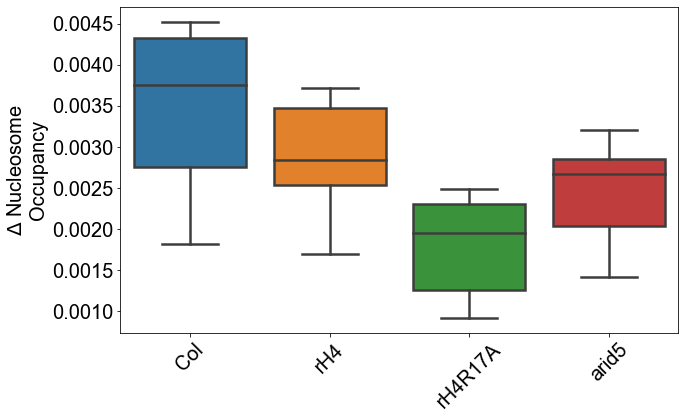

In [21]:
# Plot boxplot
ax = sns.boxplot(x="variable", y="value", data=pd.melt(comb_df), showfliers = False)
plt.ylabel("$\Delta$ Nucleosome" "\n" "Occupancy")
plt.xlabel("")
plt.xticks(rotation = 45)
filename = "peak_height/replicates_together_boxplot"
path_to_file = os.path.join(save_path, filename)
plt.gcf().set_size_inches(10, 6)
plt.savefig(path_to_file,bbox_inches='tight',dpi=500)

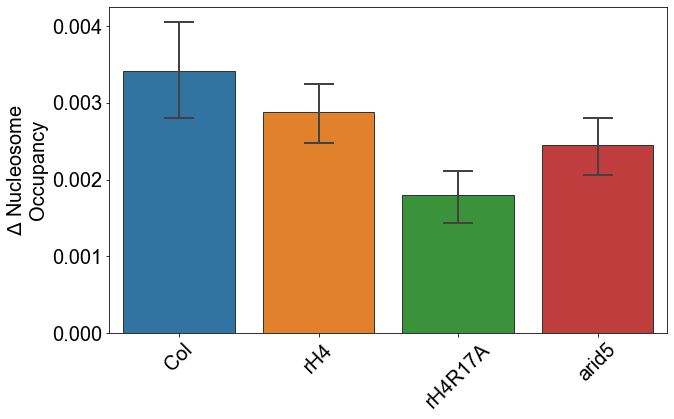

In [22]:
# Plot bar plot with means and standard deviation
ax = sns.barplot(x="variable", y="value", data=pd.melt(comb_df), errwidth=2, capsize=.2, edgecolor=".2")
plt.ylabel("$\Delta$ Nucleosome" "\n" "Occupancy")
plt.xlabel("")
plt.xticks(rotation = 45)
filename = "peak_height/replicates_together_barplot"
path_to_file = os.path.join(save_path, filename)
plt.gcf().set_size_inches(10, 6)
plt.savefig(path_to_file,bbox_inches='tight',dpi=500)

## T-test

In [23]:
# Paired t-test
print("Col vs rH4:", ttest_rel(comb_df['Col'], comb_df['rH4']))
print("Col vs rH4R17A:", ttest_rel(comb_df['Col'], comb_df['rH4R17A']))
print("Col vs arid5:", ttest_rel(comb_df['Col'], comb_df['arid5']))
print("rH4R17A vs rH4:", ttest_rel(comb_df['rH4R17A'], comb_df['rH4']))

Col vs rH4: Ttest_relResult(statistic=3.7637261759798584, pvalue=0.0044593345112569705)
Col vs rH4R17A: Ttest_relResult(statistic=9.327121847704538, pvalue=6.3696624540037716e-06)
Col vs arid5: Ttest_relResult(statistic=6.115954852055374, pvalue=0.0001758108167624603)
rH4R17A vs rH4: Ttest_relResult(statistic=-10.079468154179883, pvalue=3.349954745791774e-06)


In [24]:
# Unpaired t-test
print("Col vs rH4:", ttest_ind(comb_df['Col'], comb_df['rH4']))
print("Col vs rH4R17A:", ttest_ind(comb_df['Col'], comb_df['rH4R17A']))
print("Col vs arid5:", ttest_ind(comb_df['Col'], comb_df['arid5']))
print("rH4R17A vs rH4:", ttest_ind(comb_df['rH4R17A'], comb_df['rH4']))

Col vs rH4: Ttest_indResult(statistic=1.3656836141847377, pvalue=0.18886213647598374)
Col vs rH4R17A: Ttest_indResult(statistic=4.2959914826531955, pvalue=0.0004349455549450976)
Col vs arid5: Ttest_indResult(statistic=2.5142781275845465, pvalue=0.021655122239122502)
rH4R17A vs rH4: Ttest_indResult(statistic=-3.8290203641004985, pvalue=0.0012292641152002052)


In [25]:
# Save data frame with nucleosome peak information
comb_df.to_csv(save_path+"/peak_height/bioreps_together_peaks.csv",index=True)

## Merged data
Calculate plots for merged MNase-seq replicates

In [26]:
#Load data matrices
#Profile values at each gene
filename = "mnase-merged-proteincoding-1500.tab"
path_to_file = os.path.join(base_path, filename)
data_matrix = pd.read_csv(path_to_file, skiprows=2, sep='\t')

In [27]:
data_matrix.head()

,Col.mnase-fcnorm,Col.mnase-fcnorm.1,Col.mnase-fcnorm.2,Col.mnase-fcnorm.3,Col.mnase-fcnorm.4,Col.mnase-fcnorm.5,Col.mnase-fcnorm.6,Col.mnase-fcnorm.7,Col.mnase-fcnorm.8,Col.mnase-fcnorm.9,...,arid5.mnase-fcnorm.240,arid5.mnase-fcnorm.241,arid5.mnase-fcnorm.242,arid5.mnase-fcnorm.243,arid5.mnase-fcnorm.244,arid5.mnase-fcnorm.245,arid5.mnase-fcnorm.246,arid5.mnase-fcnorm.247,arid5.mnase-fcnorm.248,arid5.mnase-fcnorm.249
0,0.029120,0.05333,0.05087,0.06827,0.071100,0.075830,0.10630,0.08094,0.08169,0.05976,...,0.042150,0.049000,0.048330,0.056700,0.06656,0.06389,0.05017,0.063220,0.06038,0.05134
1,0.004917,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,...,0.007024,0.015220,0.026590,0.036290,0.03144,0.02659,0.01689,0.012380,0.01689,0.02408
2,0.029310,0.02515,0.02005,0.00851,0.007753,0.008131,0.02345,0.04955,0.05957,0.06014,...,0.070910,0.083620,0.062720,0.058540,0.04583,0.01957,0.01438,0.008028,0.01856,0.02509
3,0.030260,0.03669,0.06524,0.06694,0.060320,0.055220,0.03253,0.02647,0.02042,0.02572,...,0.011370,0.003345,0.002509,0.001672,0.01790,0.02341,0.02341,0.027930,0.03094,0.03730
4,0.057110,0.04368,0.02742,0.04463,0.054650,0.064670,0.06959,0.06240,0.05484,0.04047,...,0.045660,0.048000,0.036790,0.041140,0.04549,0.03395,0.03161,0.024250,0.01890,0.01672


In [28]:
#Matrix containing gene names corresponding to each row of data_matrix
filename = "mnase-merged-proteincoding-1500.bed"
path_to_file = os.path.join(base_path, filename)
sorted_genes = pd.read_csv(path_to_file, sep='\t')
#Make dataframe containing gene names and relabel gene naming convention to correspond with RNA-seq data
gene_names = sorted_genes['name'].copy()
gene_num = len(gene_names)
for i in range(gene_num):
    newname = gene_names[i]
    if newname[0:2] == 'AT':
        gene_names[i] = newname[0:-2]

In [29]:
#Make metadata matrix (has profile values and gene names)
metadata = data_matrix.copy()
metadata['gene name'] = gene_names

In [30]:
metadata.head()

,Col.mnase-fcnorm,Col.mnase-fcnorm.1,Col.mnase-fcnorm.2,Col.mnase-fcnorm.3,Col.mnase-fcnorm.4,Col.mnase-fcnorm.5,Col.mnase-fcnorm.6,Col.mnase-fcnorm.7,Col.mnase-fcnorm.8,Col.mnase-fcnorm.9,...,arid5.mnase-fcnorm.241,arid5.mnase-fcnorm.242,arid5.mnase-fcnorm.243,arid5.mnase-fcnorm.244,arid5.mnase-fcnorm.245,arid5.mnase-fcnorm.246,arid5.mnase-fcnorm.247,arid5.mnase-fcnorm.248,arid5.mnase-fcnorm.249,gene name
0,0.029120,0.05333,0.05087,0.06827,0.071100,0.075830,0.10630,0.08094,0.08169,0.05976,...,0.049000,0.048330,0.056700,0.06656,0.06389,0.05017,0.063220,0.06038,0.05134,AT1G01010
1,0.004917,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,...,0.015220,0.026590,0.036290,0.03144,0.02659,0.01689,0.012380,0.01689,0.02408,AT1G01020
2,0.029310,0.02515,0.02005,0.00851,0.007753,0.008131,0.02345,0.04955,0.05957,0.06014,...,0.083620,0.062720,0.058540,0.04583,0.01957,0.01438,0.008028,0.01856,0.02509,AT1G01030
3,0.030260,0.03669,0.06524,0.06694,0.060320,0.055220,0.03253,0.02647,0.02042,0.02572,...,0.003345,0.002509,0.001672,0.01790,0.02341,0.02341,0.027930,0.03094,0.03730,AT1G01040
4,0.057110,0.04368,0.02742,0.04463,0.054650,0.064670,0.06959,0.06240,0.05484,0.04047,...,0.048000,0.036790,0.041140,0.04549,0.03395,0.03161,0.024250,0.01890,0.01672,AT1G01050


## Plot Sum of All Genes

In [31]:
#Set font 
plt.rcParams.update({'font.sans-serif':'Arial'})
plt.rcParams.update({'font.size': 24})
plt.rcParams['lines.linewidth'] = 2.5

#Add cumulative sum of nucleosome occupancy over all genes and plot profile

#sum all rows
rowsum = data_matrix.sum(axis=0)/27443

#Split data by sample
Col_data = rowsum[0:250].tolist()
rH4_data = rowsum[250:500].tolist()
R17A_data = rowsum[500:750].tolist()
arid5_data = rowsum[750:1000].tolist()

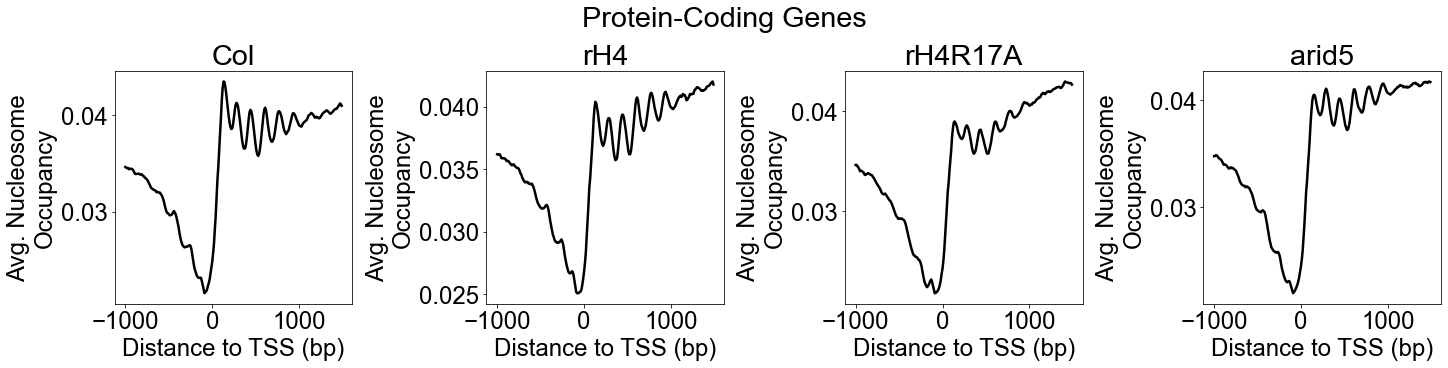

In [32]:
#Plot data
x_vals = np.arange(-1000,1500,10)
fig, axs = plt.subplots(1, 4, constrained_layout=True)
fig.set_size_inches(20, 5)
for ax in axs.flat:
    ax.set(xlabel='Distance to TSS (bp)', ylabel="Avg. Nucleosome" "\n" "Occupancy")
axs[0].plot(x_vals, Col_data, color="black")
axs[0].set_title('Col')

axs[1].plot(x_vals, rH4_data, color="black")
axs[1].set_title('rH4')

axs[2].plot(x_vals, R17A_data, color="black")
axs[2].set_title('rH4R17A')

axs[3].plot(x_vals, arid5_data, color="black")
axs[3].set_title('arid5')

fig.suptitle('Protein-Coding Genes')
filename = "protein-coding_profiles/merged_reps_1500down"
path_to_file = os.path.join(save_path, filename)
plt.savefig(path_to_file)

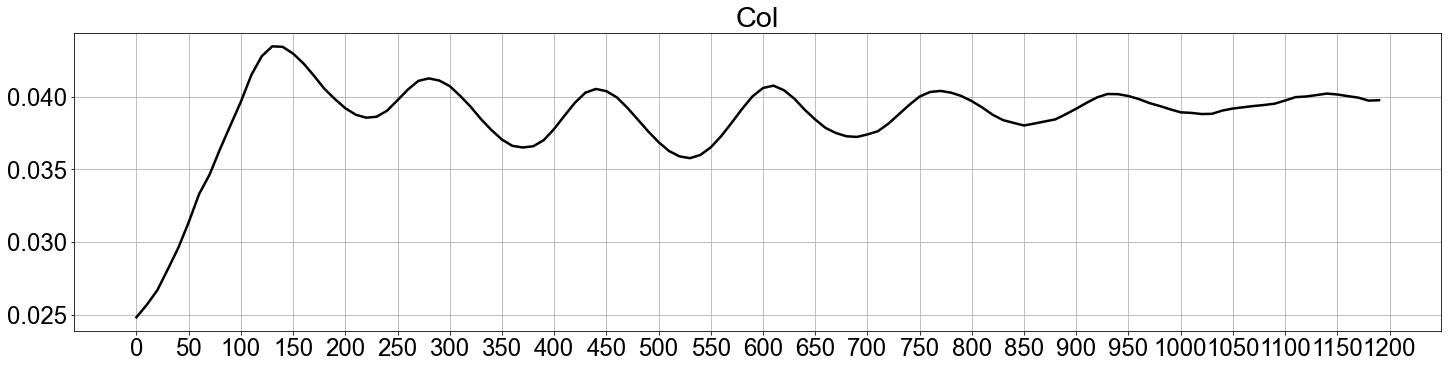

In [33]:
# Plot control sample with gridlines to visualize nucleosome peak coordinates
x_vals = np.arange(0,1200,10)
fig, ax = plt.subplots(1, 1, constrained_layout=True)
fig.set_size_inches(20, 5)
plt.plot(x_vals, Col_data[100:220], color="black")
ax.set_title('Col')
plt.xticks(np.arange(0, 1250, 50))
ax.grid(True)

In [34]:
peak_data = []

# Calculate peak data for each sample and append to list
peak_data.append(calc_peaks(Col_data))
peak_data.append(calc_peaks(rH4_data))
peak_data.append(calc_peaks(R17A_data))
peak_data.append(calc_peaks(arid5_data))

# Initialize peak data frame
peak_df = pd.DataFrame(np.array(peak_data).T.tolist(), columns=colnames_merge)
peak_df.head()

,Col,rH4,rH4R17A,arid5
0,0.003735,0.002777,0.002098,0.002964
1,0.004404,0.003405,0.002400,0.002722
2,0.004267,0.003614,0.002103,0.002993
3,0.002778,0.002633,0.001352,0.002031
4,0.001776,0.001838,0.000949,0.001480


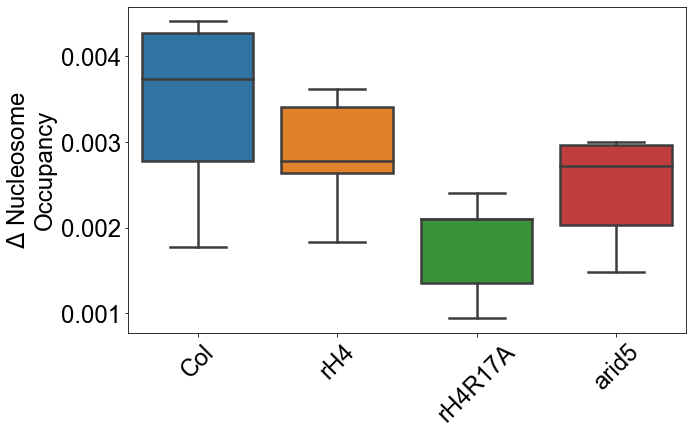

In [35]:
# Plot boxplot
ax = sns.boxplot(x="variable", y="value", data=pd.melt(peak_df), showfliers = False)
plt.ylabel("$\Delta$ Nucleosome" "\n" "Occupancy")
plt.xlabel("")
plt.xticks(rotation = 45)
filename = "peak_height/merged_nonorm_boxplot"
path_to_file = os.path.join(save_path, filename)
plt.gcf().set_size_inches(10, 6)
plt.savefig(path_to_file,bbox_inches='tight',dpi=500)

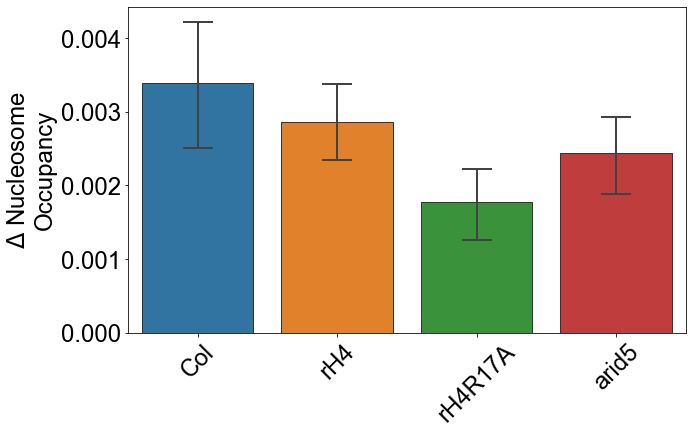

In [36]:
# Plot bar plot with means and standard deviation
ax = sns.barplot(x="variable", y="value", data=pd.melt(peak_df), errwidth=2, capsize=.2, edgecolor=".2")
plt.ylabel("$\Delta$ Nucleosome" "\n" "Occupancy")
plt.xlabel("")
plt.xticks(rotation = 45)
filename = "peak_height/merged_nonorm_barplot"
path_to_file = os.path.join(save_path, filename)
plt.gcf().set_size_inches(10, 6)
plt.savefig(path_to_file,bbox_inches='tight',dpi=500)

In [37]:
# Paired t-test
print("Col vs rH4:", ttest_rel(peak_df['Col'], peak_df['rH4']))
print("Col vs rH4R17A:", ttest_rel(peak_df['Col'], peak_df['rH4R17A']))
print("Col vs arid5:", ttest_rel(peak_df['Col'], peak_df['arid5']))
print("rH4R17A vs rH4:", ttest_rel(peak_df['rH4R17A'], peak_df['rH4']))

Col vs rH4: Ttest_relResult(statistic=2.5159834343220857, pvalue=0.06563714450388503)
Col vs rH4R17A: Ttest_relResult(statistic=6.8430106731085765, pvalue=0.0023863284502371566)
Col vs arid5: Ttest_relResult(statistic=3.991627311627732, pvalue=0.01624289307348844)
rH4R17A vs rH4: Ttest_relResult(statistic=-7.333886357367426, pvalue=0.001839985056898717)


In [38]:
# Unpaired t-test
print("Col vs rH4:", ttest_ind(peak_df['Col'], peak_df['rH4']))
print("Col vs rH4R17A:", ttest_ind(peak_df['Col'], peak_df['rH4R17A']))
print("Col vs arid5:", ttest_ind(peak_df['Col'], peak_df['arid5']))
print("rH4R17A vs rH4:", ttest_ind(peak_df['rH4R17A'], peak_df['rH4']))

Col vs rH4: Ttest_indResult(statistic=0.9191400596897793, pvalue=0.38489767152135923)
Col vs rH4R17A: Ttest_indResult(statistic=2.858129873470117, pvalue=0.021212288081289415)
Col vs arid5: Ttest_indResult(statistic=1.6545668505515712, pvalue=0.1366087414964769)
rH4R17A vs rH4: Ttest_indResult(statistic=-2.5906754453521397, pvalue=0.03207940665132344)


In [39]:
# Save data frame with nucleosome peak information
peak_df.to_csv(save_path+"/peak_height/merged_peaks.csv",index=True)

## Combine nucleosome positioning data with expression data from RNA-seq

In [40]:
# Subset data to only include protein coding genes (Chr1-5)
# Load protein coding gene annotation file
base_path = "/Users/emmacorcoran/Desktop/annotations"
filename = "proteincoding_1to5.txt"
path_to_file = os.path.join(base_path, filename)
proteincoding_list = pd.read_csv(path_to_file, sep='\t', header=None)
proteincoding_list.columns = ['gene name','classification']

In [41]:
# Merge metadata with protein coding list
metadata = pd.merge(metadata, proteincoding_list, on="gene name")
metadata.head()

,Col.mnase-fcnorm,Col.mnase-fcnorm.1,Col.mnase-fcnorm.2,Col.mnase-fcnorm.3,Col.mnase-fcnorm.4,Col.mnase-fcnorm.5,Col.mnase-fcnorm.6,Col.mnase-fcnorm.7,Col.mnase-fcnorm.8,Col.mnase-fcnorm.9,...,arid5.mnase-fcnorm.242,arid5.mnase-fcnorm.243,arid5.mnase-fcnorm.244,arid5.mnase-fcnorm.245,arid5.mnase-fcnorm.246,arid5.mnase-fcnorm.247,arid5.mnase-fcnorm.248,arid5.mnase-fcnorm.249,gene name,classification
0,0.029120,0.05333,0.05087,0.06827,0.071100,0.075830,0.10630,0.08094,0.08169,0.05976,...,0.048330,0.056700,0.06656,0.06389,0.05017,0.063220,0.06038,0.05134,AT1G01010,protein_coding
1,0.004917,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,...,0.026590,0.036290,0.03144,0.02659,0.01689,0.012380,0.01689,0.02408,AT1G01020,protein_coding
2,0.029310,0.02515,0.02005,0.00851,0.007753,0.008131,0.02345,0.04955,0.05957,0.06014,...,0.062720,0.058540,0.04583,0.01957,0.01438,0.008028,0.01856,0.02509,AT1G01030,protein_coding
3,0.030260,0.03669,0.06524,0.06694,0.060320,0.055220,0.03253,0.02647,0.02042,0.02572,...,0.002509,0.001672,0.01790,0.02341,0.02341,0.027930,0.03094,0.03730,AT1G01040,protein_coding
4,0.057110,0.04368,0.02742,0.04463,0.054650,0.064670,0.06959,0.06240,0.05484,0.04047,...,0.036790,0.041140,0.04549,0.03395,0.03161,0.024250,0.01890,0.01672,AT1G01050,protein_coding


In [42]:
#Load RNA-seq tpm expression data
def rnaseq_load(path):
    tpm_file = pd.read_csv(path, sep='\t', header=0)
    tpm_file.columns = ['gene name','rep1','rep2']
    tpm_file['avg'] = tpm_file[['rep1', 'rep2']].mean(axis=1)
    tpm_file = tpm_file.sort_values(by=['gene name'])
    return tpm_file

In [43]:
base_path_1 = "/Users/emmacorcoran/Documents/R Scripts/RNA-seq/2020_10_02 RNA-seq/tpm/ordered_tpm_avg/"
base_path_2 = "/Users/emmacorcoran/Documents/R Scripts/RNA-seq/2021_05_21 RNA-seq/tpm/ordered_tpm_avg/"
base_path_3 = "/Users/emmacorcoran/Documents/R Scripts/RNA-seq/2021_07_08 RNA-seq/tpm/ordered_tpm_avg/"
base_path_4 = "/Users/emmacorcoran/Documents/R Scripts/RNA-seq/2021_09_16 RNA-seq/tpm/ordered_tpm_avg/"

#Load Col expression data
filename = "Col_ordered_tpm.txt"
path_to_file = os.path.join(base_path_1, filename)
Col_tpm = rnaseq_load(path_to_file)

#Load rH4-1 (68-21C) expression data
filename = "68-21C_ordered_tpm.txt"
path_to_file = os.path.join(base_path_1, filename)
x68_21C_tpm = rnaseq_load(path_to_file)

#Load rH4-2 (68-18D) expression data
filename = "x68_18D_ordered_tpm.txt"
path_to_file = os.path.join(base_path_4, filename)
x68_18D_tpm = rnaseq_load(path_to_file)

#Load H4R17A-1 (13-6) expression data
filename = "13-6_ordered_tpm.txt"
path_to_file = os.path.join(base_path_2, filename)
x13_6_tpm = rnaseq_load(path_to_file)

#Load H4R17A-2 (13-9) expression data
filename = "13-9_ordered_tpm.txt"
path_to_file = os.path.join(base_path_1, filename)
x13_9_tpm = rnaseq_load(path_to_file)

#Load arid5 expression data
filename = "arid5_ordered_tpm.txt"
path_to_file = os.path.join(base_path_2, filename)
arid5_tpm = rnaseq_load(path_to_file)

#Load rlt1/2 expression data
filename = "rlt12_ordered_tpm.txt"
path_to_file = os.path.join(base_path_3, filename)
rlt12_tpm = rnaseq_load(path_to_file)

In [44]:
#Merge metadata with tpm expression data and subset for one sample, plot expression groups
def rowsum_tpm(all_data, tpm_label):
    tpm_data = all_data.loc[all_data['expression category'] == tpm_label]
    tpm_data = tpm_data.iloc[:,0:250]
    nrow = tpm_data.shape[0]
    tpm_rowsum = np.array(tpm_data.sum(axis=0))/nrow
    return tpm_rowsum

In [45]:
def tpm_expression_4groups(metadata_df, tpm_data, sample_colstart, sample_colend):
    #Merge metadata with tpm expression data and subset for one sample
    all_data = pd.merge(metadata_df, tpm_data, on="gene name")
    subset_data = all_data.iloc[:,sample_colstart:sample_colend]
    subset_data['gene name'] = all_data['gene name']
    subset_data['expression'] = all_data['avg']

    ### Add column to metadata with gene groups
    # Make gene groups and count number of genes in each group
    high_tpm = (subset_data['expression']>=2.5)
    medhigh_tpm = ((subset_data['expression']>=0.5) & (subset_data['expression']<2.5))
    medlow_tpm = ((subset_data['expression']>0) & (subset_data['expression']<0.5))
    low_tpm = (subset_data['expression']==0)

    # Add expression category column to metadata and fill in with values
    n = len(subset_data['expression'])
    subset_data['expression category'] = ["NA"] * n
    subset_data.loc[high_tpm==True, ['expression category']] = "very high"
    subset_data.loc[medhigh_tpm==True, ['expression category']] = "high"
    subset_data.loc[medlow_tpm==True, ['expression category']] = "low"
    subset_data.loc[low_tpm==True, ['expression category']] = "very low"
    
    #Sum rows of different tpm groups
    high_rowsum = rowsum_tpm(subset_data, "very high")
    medhigh_rowsum = rowsum_tpm(subset_data, "high")
    medlow_rowsum = rowsum_tpm(subset_data, "low")
    low_rowsum = rowsum_tpm(subset_data, "very low")
    
    return [high_rowsum, medhigh_rowsum, medlow_rowsum, low_rowsum]

In [46]:
def tpm_expression_2groups(metadata_df, tpm_data, sample_colstart, sample_colend):
    #Merge metadata with tpm expression data and subset for one sample
    all_data = pd.merge(metadata_df, tpm_data, on="gene name")
    subset_data = all_data.iloc[:,sample_colstart:sample_colend]
    subset_data['gene name'] = all_data['gene name']
    subset_data['expression'] = all_data['avg']

    ### Add column to metadata with gene groups
    # Make gene groups and count number of genes in each group
    high_tpm = (subset_data['expression']>=0.5)
    low_tpm = subset_data['expression']<0.5

    # Add expression category column to metadata and fill in with values
    n = len(subset_data['expression'])
    subset_data['expression category'] = ["NA"] * n
    subset_data.loc[high_tpm==True, ['expression category']] = "high"
    subset_data.loc[low_tpm==True, ['expression category']] = "low"
    
    #Sum rows of different tpm groups
    high_rowsum = rowsum_tpm(subset_data, "high")
    low_rowsum = rowsum_tpm(subset_data, "low")
    
    return [high_rowsum, low_rowsum]

## Plots separated by expression level

In [47]:
Col_4subset = tpm_expression_4groups(metadata, Col_tpm, 0, 250)
rH4_4subset = tpm_expression_4groups(metadata, x68_21C_tpm, 250, 500)
R17A_4subset = tpm_expression_4groups(metadata, x13_6_tpm, 500, 750)
arid5_4subset = tpm_expression_4groups(metadata, arid5_tpm, 750, 1000)

In [48]:
Col_2subset = tpm_expression_2groups(metadata, Col_tpm, 0, 250)
rH4_2subset = tpm_expression_2groups(metadata, x68_21C_tpm, 250, 500)
R17A_2subset = tpm_expression_2groups(metadata, x13_6_tpm, 500, 750)
arid5_2subset = tpm_expression_2groups(metadata, arid5_tpm, 750, 1000)

In [49]:
# Function to plot peak data
def make_peak_plots(peak_df, name):
    
    # Plot boxplot
    ax = sns.boxplot(x="variable", y="value", data=pd.melt(peak_df), showfliers = False)
    plt.ylabel("$\Delta$ Nucleosome" "\n" "Occupancy")
    plt.xlabel("")
    plt.xticks(rotation = 45)
    filename = "peak_height/"+str(name)+"_boxplot"
    path_to_file = os.path.join(save_path, filename)
    plt.gcf().set_size_inches(10, 6)
    plt.savefig(path_to_file,bbox_inches='tight',dpi=500)
    plt.clf()
    
    # Plot bar plot with means and CI
    ax = sns.barplot(x="variable", y="value", data=pd.melt(peak_df), errwidth=2, capsize=.2, edgecolor=".2")
    plt.ylabel("$\Delta$ Nucleosome" "\n" "Occupancy")
    plt.xlabel("")
    plt.xticks(rotation = 45)
    filename = "peak_height/"+str(name)+"_barplot"
    path_to_file = os.path.join(save_path, filename)
    plt.gcf().set_size_inches(10, 6)
    plt.savefig(path_to_file,bbox_inches='tight',dpi=500)
    plt.clf()
    
    # Save data frame with nucleosome peak information
    peak_df.to_csv(save_path+"/peak_height/"+str(name)+".csv",index=True)

In [50]:
for i in range(4):
    peak_data = []

    # Calculate peak data for each sample and append to list
    peak_data.append(calc_peaks(Col_4subset[i]))
    peak_data.append(calc_peaks(rH4_4subset[i]))
    peak_data.append(calc_peaks(R17A_4subset[i]))
    peak_data.append(calc_peaks(arid5_4subset[i]))

    # Initialize peak data frame
    peak_df = pd.DataFrame(np.array(peak_data).T.tolist(), columns=colnames_merge)
    
    # Make plots and save data
    if i==0:
        make_peak_plots(peak_df, "very_high_exp")
    elif i==1:
        make_peak_plots(peak_df, "high_exp")
    elif i==2:
        make_peak_plots(peak_df, "low_exp")
    else:
        make_peak_plots(peak_df, "very_low_exp")

<Figure size 720x432 with 0 Axes>

In [51]:
for i in range(2):
    peak_data = []

    # Calculate peak data for each sample and append to list
    peak_data.append(calc_peaks(Col_2subset[i]))
    peak_data.append(calc_peaks(rH4_2subset[i]))
    peak_data.append(calc_peaks(R17A_2subset[i]))
    peak_data.append(calc_peaks(arid5_2subset[i]))

    # Initialize peak data frame
    peak_df = pd.DataFrame(np.array(peak_data).T.tolist(), columns=colnames_merge)
    
    # Make plots and save data
    if i==0:
        make_peak_plots(peak_df, "2groups_high_exp")
    elif i==1:
        make_peak_plots(peak_df, "2groups_low_exp")

<Figure size 720x432 with 0 Axes>

## DEG Plots

In [52]:
# Load DEG data
def deg_load(path, name):
    deg_file = pd.read_csv(path_to_file, sep='\t', header=None)
    deg_file.columns = [name]
    return deg_file

base_path = "/Users/emmacorcoran/Documents/R Scripts/RNA-seq/2021_09_16 RNA-seq/Up_and_Down"

#chr11/17 down-regulated genes
filename = "chr11chr17_downreg.txt"
path_to_file = os.path.join(base_path, filename)
chr_downreg = deg_load(path_to_file, "gene name")
#chr11/17 up-regulated genes
filename = "chr11chr17_upreg.txt"
path_to_file = os.path.join(base_path, filename)
chr_upreg = deg_load(path_to_file, "gene name")

#R17A-2 down-regulated genes
filename = "13.9_downreg.txt"
path_to_file = os.path.join(base_path, filename)
x13_9_downreg = deg_load(path_to_file, "gene name")
#R17A-2 up-regulated genes
filename = "13.9_downreg.txt"
path_to_file = os.path.join(base_path, filename)
x13_9_upreg = deg_load(path_to_file, "gene name")

#R17A-1 down-regulated genes
filename = "13.6_downreg.txt"
path_to_file = os.path.join(base_path, filename)
x13_6_downreg = deg_load(path_to_file, "gene name")
#R17A-1 up-regulated genes
filename = "13.6_downreg.txt"
path_to_file = os.path.join(base_path, filename)
x13_6_upreg = deg_load(path_to_file, "gene name")

#arid5 down-regulated genes
filename = "arid5_downreg.txt"
path_to_file = os.path.join(base_path, filename)
arid5_downreg = deg_load(path_to_file, "gene name")
#arid5 up-regulated genes
filename = "arid5_upreg.txt"
path_to_file = os.path.join(base_path, filename)
arid5_upreg = deg_load(path_to_file, "gene name")

#rlt1/2 down-regulated genes
filename = "rlt12_downreg.txt"
path_to_file = os.path.join(base_path, filename)
rlt12_downreg = deg_load(path_to_file, "gene name")
#rlt1/2 up-regulated genes
filename = "rlt12_upreg.txt"
path_to_file = os.path.join(base_path, filename)
rlt12_upreg = deg_load(path_to_file, "gene name")

In [53]:
def merge_upanddown(metadata, downreg, upreg):
    downreg_subset = pd.merge(metadata, downreg, on="gene name")
    upreg_subset = pd.merge(metadata, upreg, on="gene name")
    upreg_subset['DEG'] = "up"
    downreg_subset['DEG'] = "down"
    deg_subset = downreg_subset.append(upreg_subset)
    return(deg_subset)

In [54]:
#Merge metadata with DEG data
chr_deg_subset = merge_upanddown(metadata, chr_downreg, chr_upreg)
arid5_deg_subset = merge_upanddown(metadata, arid5_downreg, arid5_upreg)
rlt12_deg_subset = merge_upanddown(metadata, rlt12_downreg, rlt12_upreg)
x13_6_deg_subset = merge_upanddown(metadata, x13_6_downreg, x13_6_upreg)
x13_9_deg_subset = merge_upanddown(metadata, x13_9_downreg, x13_9_upreg)

In [55]:
def merge_all(metadata, deg_1, deg_2, deg_3=None, deg_4=None, deg_5=None):
    all_deg = pd.merge(deg_1, deg_2, on="gene name", how="outer")
    if deg_3 is not None:
        all_deg = pd.merge(all_deg, deg_3, on="gene name", how="outer")
    if deg_4 is not None:
        all_deg = pd.merge(all_deg, deg_4, on="gene name", how="outer")
    if deg_5 is not None:
        all_deg = pd.merge(all_deg, deg_5, on="gene name", how="outer")
    deg_subset = pd.merge(metadata, all_deg, on="gene name")
    return(deg_subset)

In [56]:
chr_deg = pd.merge(chr_downreg, chr_upreg, how="outer")
arid5_deg = pd.merge(arid5_downreg, arid5_upreg, how="outer")
rlt12_deg = pd.merge(rlt12_downreg, rlt12_upreg, how="outer")
x13_6_deg = pd.merge(x13_6_downreg, x13_6_upreg, how="outer")
x13_9_deg = pd.merge(x13_9_downreg, x13_9_upreg, how="outer")
x13_deg = pd.merge(x13_6_deg, x13_9_deg, how="outer")

iswi_deg_subset = merge_all(metadata, chr_deg, arid5_deg, rlt12_deg)
all_deg_subset = merge_all(metadata, chr_deg, arid5_deg, rlt12_deg, x13_deg)
x13_deg_subset = merge_all(metadata, x13_6_deg, x13_9_deg)

In [57]:
#Unaffected genes
# Load DEG data
def deg_load(path, name):
    deg_file = pd.read_csv(path_to_file, sep='\t', header=None)
    deg_file.columns = [name]
    return deg_file

base_path = "/Users/emmacorcoran/Documents/R Scripts/RNA-seq/2021_09_16 RNA-seq/Unaffected"

#chr11/17 Unaffected genes
filename = "chrvsCol.txt"
path_to_file = os.path.join(base_path, filename)
chr_unaffected = deg_load(path_to_file, "gene name")

#arid5 Unaffected genes
filename = "arid5vsCol.txt"
path_to_file = os.path.join(base_path, filename)
arid5_unaffected = deg_load(path_to_file, "gene name")

#rlt1/2 Unaffected genes
filename = "rlt12vsCol.txt"
path_to_file = os.path.join(base_path, filename)
rlt12_unaffected = deg_load(path_to_file, "gene name")

#13.6 Unaffected genes
filename = "13.6vsCol.txt"
path_to_file = os.path.join(base_path, filename)
s13_6_unaffected = deg_load(path_to_file, "gene name")

#13.9 Unaffected genes
filename = "13.9vsCol.txt"
path_to_file = os.path.join(base_path, filename)
s13_9_unaffected = deg_load(path_to_file, "gene name")

In [58]:
def merge_unaffected(metadata, deg_1, deg_2, deg_3=None, deg_4=None, deg_5=None):
    all_deg = pd.merge(deg_1, deg_2, on="gene name", how="outer")
    if deg_3 is not None:
        all_deg = pd.merge(all_deg, deg_3, on="gene name", how="outer")
    if deg_4 is not None:
        all_deg = pd.merge(all_deg, deg_4, on="gene name", how="outer")
    if deg_5 is not None:
        all_deg = pd.merge(all_deg, deg_5, on="gene name", how="outer")
    deg_subset = pd.merge(metadata, all_deg, on="gene name")
    return(deg_subset)

In [59]:
chr_unaffected_subset = pd.merge(metadata, chr_unaffected, on="gene name")
rlt12_unaffected_subset = pd.merge(metadata, rlt12_unaffected, on="gene name")
arid5_unaffected_subset = pd.merge(metadata, arid5_unaffected, on="gene name")
s13_6_unaffected_subset = pd.merge(metadata, s13_6_unaffected, on="gene name")
s13_9_unaffected_subset = pd.merge(metadata, s13_9_unaffected, on="gene name")

x13_unaffected = pd.merge(s13_6_unaffected, s13_9_unaffected, how="outer")

iswi_unaffected_subset = merge_unaffected(metadata, chr_unaffected, arid5_unaffected, rlt12_unaffected)
all_unaffected_subset = merge_unaffected(metadata, chr_unaffected, arid5_unaffected, rlt12_unaffected, x13_unaffected)
x13_unaffected_subset = merge_unaffected(metadata, s13_6_unaffected, s13_9_unaffected)

In [60]:
iswi_unaffected_subset

,Col.mnase-fcnorm,Col.mnase-fcnorm.1,Col.mnase-fcnorm.2,Col.mnase-fcnorm.3,Col.mnase-fcnorm.4,Col.mnase-fcnorm.5,Col.mnase-fcnorm.6,Col.mnase-fcnorm.7,Col.mnase-fcnorm.8,Col.mnase-fcnorm.9,...,arid5.mnase-fcnorm.242,arid5.mnase-fcnorm.243,arid5.mnase-fcnorm.244,arid5.mnase-fcnorm.245,arid5.mnase-fcnorm.246,arid5.mnase-fcnorm.247,arid5.mnase-fcnorm.248,arid5.mnase-fcnorm.249,gene name,classification
0,0.004917,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.02659,0.03629,0.03144,0.02659,0.01689,0.01238,0.01689,0.02408,AT1G01020,protein_coding
1,0.003782,0.003782,0.003782,0.003215,0.000000,0.000000,0.00208,0.003782,0.003782,0.004917,...,0.02592,0.03010,0.03328,0.03746,0.03429,0.02392,0.01723,0.00669,AT1G01060,protein_coding
2,0.065810,0.067890,0.057490,0.041980,0.010210,0.014560,0.01229,0.022500,0.034800,0.039520,...,0.01756,0.01321,0.01020,0.01003,0.02877,0.05402,0.07091,0.08881,AT1G01080,protein_coding
3,0.028930,0.035360,0.050870,0.042170,0.048980,0.037060,0.01078,0.006997,0.015130,0.037250,...,0.05285,0.06824,0.06272,0.07275,0.05803,0.06723,0.08178,0.10190,AT1G01090,protein_coding
4,0.032150,0.026660,0.024210,0.030260,0.045390,0.042170,0.04104,0.026660,0.016450,0.037250,...,0.00669,0.00669,0.00669,0.01254,0.01003,0.01154,0.01656,0.00853,AT1G01100,protein_coding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9611,0.018910,0.019860,0.018150,0.004349,0.003782,0.002837,0.01305,0.061650,0.104600,0.143000,...,0.07225,0.07024,0.07509,0.06155,0.04516,0.05001,0.04516,0.07376,AT5G67540,protein_coding
9612,0.049730,0.051630,0.052570,0.042550,0.037250,0.031770,0.02118,0.015320,0.031960,0.054080,...,0.03194,0.03596,0.04449,0.03730,0.03044,0.03746,0.04281,0.04984,AT5G67580,protein_coding
9613,0.029880,0.032900,0.041790,0.035360,0.022500,0.015130,0.02837,0.076400,0.085480,0.084530,...,0.03847,0.02910,0.03094,0.02626,0.01689,0.02258,0.03462,0.03278,AT5G67590,protein_coding
9614,0.012290,0.011350,0.010780,0.007564,0.001891,0.005862,0.01702,0.024210,0.026470,0.023640,...,0.02459,0.03579,0.02709,0.03278,0.03429,0.01505,0.03128,0.02826,AT5G67610,protein_coding


In [61]:
# Function to sum all rows and calculate peak data for each sample
def peak_sum(data_matrix, name):
    #sum all rows
    rowsum = data_matrix.sum(axis=0)/27443

    #Split data by sample
    Col_data = rowsum[0:250].tolist()
    rH4_data = rowsum[250:500].tolist()
    R17A_data = rowsum[500:750].tolist()
    arid5_data = rowsum[750:1000].tolist()
    
    peak_data = []
    # Calculate peak data for each sample and append to list
    peak_data.append(calc_peaks(Col_data))
    peak_data.append(calc_peaks(rH4_data))
    peak_data.append(calc_peaks(R17A_data))
    peak_data.append(calc_peaks(arid5_data))
                     
    # Initialize peak data frame
    peak_df = pd.DataFrame(np.array(peak_data).T.tolist(), columns=colnames_merge)

    # Make plots and save data
    make_peak_plots(peak_df, name)

In [62]:
peak_sum(iswi_deg_subset.drop(['gene name', 'classification'],axis=1), "ISWI_exp_changes")
peak_sum(iswi_unaffected_subset.drop(['gene name', 'classification'],axis=1), "ISWI_noexp_changes")

<Figure size 720x432 with 0 Axes>